##**Introduction:**

Recurrent Neural Network(RNN) are the state of the aret algorithm for sequential data and are used by Apple's Siri and Google's Voice search. 

It is an algorithm that remembers its input due to its internal memeory which makes the algorithm perfectly suited for solving machine learning problems invovling sequential data.

It is one of the algorithms that have great results in deep learning.
Here we will predict of the price of Bitcoin by analyzing the information of the last 6 years.

###**Bitcoin:** 
Bitcoin is a cryptocurrency that was created in Jan 2009. It is the world's most valuable cryptocurrency and is traded on over 40 exchanges around the world, accepting over 30 different currencies. As a currecy Bitcoin offers a new opportunity for price forecasting as it has high volatility which is much higher compared to traditional currencies.

##**Technologies Used:**

  * **Recurrent Neural Networks:** RNN's are a robust and powerful type of neural network and are considered one of the most professional algorithms because they are the only ones with internal memory.

  The algorithm poerforms very well for sequentialdata such as time-series, speech, text, financial data, audio, video, weather and more.
  RNNs are able to form a much deeper understanding of a sequence and its context compared to other algorithms.
  In an RNN, the information  gores through a cycle, and when making a decision it considers the current input and also what it has leaerned from the inputs it has received previously.

  * **Long-Short-Term-Memory(LSTM):**
  LSTM networks are an extension of recurrent nerual networks, which basically extend the memory. Therefore it is well sutied to learn from important experiences that have very long time lags in between.
  LSTMs enable RNNs to remember inputs over a long period of time, this is because LSTMs contain information in a memory, much like the memory of a computer. The LSTM can read, write and delete information from its memory.
  
  In an LSTM you have three gates: Input,Forget and Output gate. These gates determine whether or not to let new input in (input gate), delete the information becuase it isn't important (forget gate), or let it impact the output at the current timestep(output gate).


  The gates in an LSTM are analog in the form of signoids, meaning they range from zero to one. The fact that they are analog enables them to do backpropagation.

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns  

from sklearn.preprocessing import MinMaxScaler

In [21]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [4]:
df = pd.read_csv('/content/BTC-USD.csv',date_parser = True)
df.shape

(2078, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
1,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
3,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
4,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2073,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,27727866812
2074,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,32518803300
2075,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,31288157264
2076,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,29584186947
2077,2020-05-27,8837.380859,9203.320313,8834.157227,9181.017578,9181.017578,32740536902


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2078 non-null   object 
 1   Open       2078 non-null   float64
 2   High       2078 non-null   float64
 3   Low        2078 non-null   float64
 4   Close      2078 non-null   float64
 5   Adj Close  2078 non-null   float64
 6   Volume     2078 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.8+ KB


In [9]:
df.replace('?',np.nan,inplace = True)
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
train_data = df[df['Date']<'2020-01-01'].copy()
train_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
1,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
3,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
4,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
...,...,...,...,...,...,...,...
1925,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,22777360996
1926,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,21365673026
1927,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,22445257702
1928,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,22874131672


In [12]:
test_data = df[df['Date']>='2020-01-01'].copy()
test_data

,Date,Open,High,Low,Close,Adj Close,Volume
1930,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1931,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
1932,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
1933,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
1934,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...,...
2073,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,27727866812
2074,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,32518803300
2075,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,31288157264
2076,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,29584186947


In [13]:
train_new = train_data.drop(['Date','Adj Close'],axis = 1)
train_new.head()

,Open,High,Low,Close,Volume
0,424.102997,427.834991,384.532013,394.795990,37919700
1,394.673004,423.295990,389.882996,408.903992,36863600
2,408.084991,412.425995,393.181000,398.821014,26580100
3,399.100006,406.915985,397.130005,402.152008,24127600
4,402.092010,441.557007,396.196991,435.790985,45099500


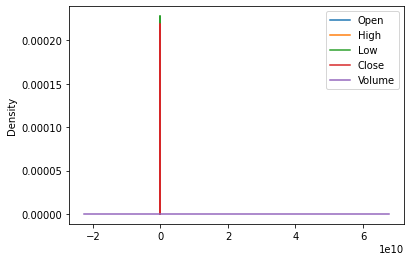

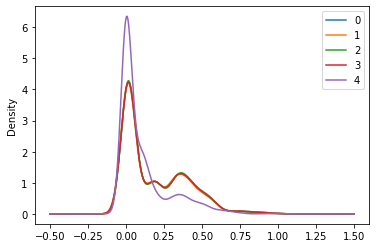

In [17]:
mms = MinMaxScaler()
train_new.plot.kde()
train_new = mms.fit_transform(train_new)
pd.DataFrame(train_new).plot.kde()

In [25]:
X_train,y_train = [],[]
train_new.shape[0]

1930

In [26]:
for i in range(60,train_new.shape[0]):
  X_train.append(train_new[i-60:i])
  y_train.append(train_new[i,0])

X_train, y_train = np.array(X_train),np.array(y_train)
X_train.shape,y_train.shape

((1870, 60, 5), (1870,))

In [27]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu',return_sequences = True,input_shape = (X_train.shape[1],5)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60,activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80,activation ='relu',return_sequences = True ))
model.add(Dropout(0.4))
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 50)            11200     
                                                                 
 dropout_4 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [28]:
model.compile(optimizer ='adam',loss = 'mean_squared_error')
history = model.fit(X_train,y_train,epochs = 20,batch_size = 50,validation_split = 0.1)

Epoch 1/20
34/34 [==============================] - 20s 415ms/step - loss: 0.0184 - val_loss: 0.0176
Epoch 2/20
34/34 [==============================] - 12s 339ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 3/20
34/34 [==============================] - 14s 409ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 4/20
34/34 [==============================] - 17s 500ms/step - loss: 0.0042 - val_loss: 0.0070
Epoch 5/20
34/34 [==============================] - 15s 436ms/step - loss: 0.0038 - val_loss: 0.0071
Epoch 6/20
34/34 [==============================] - 16s 462ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 7/20
34/34 [==============================] - 15s 452ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 8/20
34/34 [==============================] - 16s 451ms/step - loss: 0.0028 - val_loss: 0.0015
Epoch 9/20
34/34 [==============================] - 11s 330ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 10/20
34/34 [==============================] - 13s 378ms/step - loss: 0.0028 - val_lo

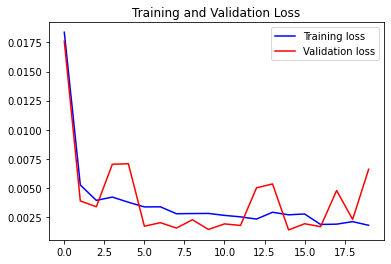

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss,'b',label = 'Training loss')
plt.plot(epochs, val_loss, 'r',label = 'Validation loss')
plt.title('Training and Validation Loss')  
plt.legend()
plt.show()

In [30]:
#test data

part_60days = train_data.tail(60)    
dff = part_60days.append(test_data,ignore_index = True)
dff.drop(['Date','Adj Close'],axis = 1,inplace = True) 
dff.head()

,Open,High,Low,Close,Volume
0,9259.783203,9377.486328,9249.587891,9324.717773,21242676385
1,9324.787109,9379.806641,9141.251953,9235.354492,21132220847
2,9235.607422,9505.051758,9191.485352,9412.612305,26170255634
3,9413.004883,9457.417969,9256.931641,9342.527344,26198609048
4,9340.864258,9423.237305,9305.909180,9360.879883,23133895765


In [31]:
inputs = mms.transform(dff)
inputs

array([[0.4706426 , 0.46111744, 0.48280998, 0.47344448, 0.47088353],
       [0.47401087, 0.46123417, 0.47704822, 0.46881889, 0.4684344 ],
       [0.4693899 , 0.46753509, 0.47971984, 0.47799406, 0.58014293],
       ...,
       [0.44609842, 0.43966175, 0.45462663, 0.45181931, 0.69362236],
       [0.45249663, 0.44172249, 0.45662774, 0.44809858, 0.65584016],
       [0.44875522, 0.45235537, 0.46071565, 0.46600631, 0.72582603]])

In [32]:
X_test,y_test = [],[]
for i in range(60, inputs.shape[0]):
  X_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])

X_test,y_test= np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape


((148, 60, 5), (148,))

In [34]:
y_pred = model.predict(X_test)
y_pred,y_test

5/5 [==============================] - 1s 55ms/step


(array([[0.32803318],
        [0.3276251 ],
        [0.3265852 ],
        [0.32532576],
        [0.3240315 ],
        [0.32292143],
        [0.32241198],
        [0.32323924],
        [0.32598287],
        [0.33032334],
        [0.33586493],
        [0.34200302],
        [0.3480411 ],
        [0.35341403],
        [0.35893413],
        [0.36518237],
        [0.37190434],
        [0.37894216],
        [0.38589194],
        [0.3923478 ],
        [0.39745376],
        [0.40057126],
        [0.40146038],
        [0.40028664],
        [0.39732513],
        [0.39282313],
        [0.38741547],
        [0.38225183],
        [0.37875354],
        [0.37778667],
        [0.37973678],
        [0.3842855 ],
        [0.39047667],
        [0.39742634],
        [0.4042987 ],
        [0.41026792],
        [0.41526085],
        [0.41969356],
        [0.42381346],
        [0.42777786],
        [0.43179688],
        [0.4360356 ],
        [0.44042322],
        [0.44530866],
        [0.45107332],
        [0

In [35]:
mms.scale_

array([5.18164146e-05, 5.03087220e-05, 5.31841635e-05, 5.17617168e-05,
       2.21730382e-11])

In [36]:
scale = 1/5.18164146e-05
y_test = y_test*scale
y_pred = y_pred*scale 

y_pred

array([[6330.681 ],
       [6322.805 ],
       [6302.737 ],
       [6278.4307],
       [6253.453 ],
       [6232.03  ],
       [6222.198 ],
       [6238.163 ],
       [6291.1123],
       [6374.8784],
       [6481.825 ],
       [6600.2837],
       [6716.8115],
       [6820.5034],
       [6927.0356],
       [7047.6196],
       [7177.346 ],
       [7313.1685],
       [7447.2915],
       [7571.883 ],
       [7670.422 ],
       [7730.5864],
       [7747.7456],
       [7725.0938],
       [7667.9395],
       [7581.056 ],
       [7476.694 ],
       [7377.0415],
       [7309.5283],
       [7290.8687],
       [7328.504 ],
       [7416.289 ],
       [7535.772 ],
       [7669.893 ],
       [7802.522 ],
       [7917.721 ],
       [8014.0796],
       [8099.626 ],
       [8179.1353],
       [8255.644 ],
       [8333.207 ],
       [8415.01  ],
       [8499.686 ],
       [8593.969 ],
       [8705.221 ],
       [8826.029 ],
       [8942.718 ],
       [9039.45  ],
       [9106.47  ],
       [9145.299 ],


In [37]:
y_test

array([ 7017.9950906 ,  7025.65427061,  6807.5317115 ,  7168.47848868,
        7233.55466072,  7233.55514872,  7591.7851299 ,  7985.0385481 ,
        7905.39889906,  7701.41061796,  7985.2939191 ,  7856.36472004,
        8012.87497412,  7964.03610609,  8648.44675144,  8635.58444644,
        8548.31296239,  8750.31491549,  8764.5483145 ,  8527.73483738,
        8482.09421236,  8567.3139394 ,  8503.75339237,  8228.67038423,
        8263.22214224,  8187.51315721,  8420.41159533,  8735.62741549,
        9180.57370472,  9139.11960369,  9331.41647879,  9169.46042371,
        9212.92331473,  9167.78659571,  9115.94479868,  9006.51901763,
        9440.92429085,  9549.1059319 ,  9616.17331494,  9686.99753298,
        9938.6625721 ,  9678.99460397, 10025.49069715, 10147.06394021,
       10034.65378315, 10136.95944721,  9712.28268999,  9759.66354901,
        9514.33347089,  9966.90183012,  9452.42819686,  9434.88522885,
        9510.81003289,  9486.42136087,  9744.68601001,  9474.41550187,
      

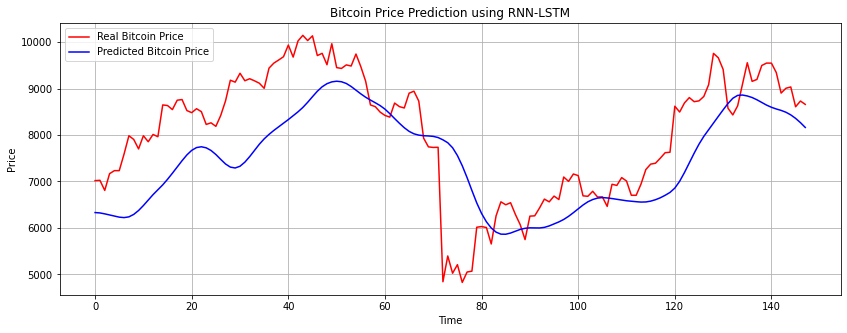

In [38]:
plt.figure(figsize = (14,5)) 
plt.plot(y_test,color = 'red',label = 'Real Bitcoin Price')
plt.plot(y_pred,color = 'blue',label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

##**Conclusion:**
RNNs and LSTM are excellent technologies and have great architectures that can be used to analyze and predict time-series information.